In [1]:
#Keenan Kunc, Brian Chae, June Suh, Christian Prosser
#Importing necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import unittest

In [2]:
#Dataset
mobile = pd.read_csv('mobile_prices.csv')
print(mobile.head())
print(mobile.columns)

#Question of interest:
#How do real-world examples of phones from 2018 or earlier compare with this dataset in terms of features and prices?

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_

In [3]:
#8 real-world phones from 2018 or earlier--information is listed and converted into a DataFrame
iphoneX_2017 = pd.Series([2716, 1, 2.39, 1, 7, 1, 64, 0.77, 174, 6, 12, 1125, 2436, 3000,\
                                    14.35, 7.09, 21, 1, 1, 1, 3])
samsung_galaxy_a8_2018 = pd.Series([3000, 1, 2.2, 1, 16, 1, 32, 0.84, 172, 8, 16, 1080, 2220, 4000,\
                                    14.22, 6.86, 24, 1, 1, 1, 3])
google_pixel_2_2017 = pd.Series([2700, 1, 2.35, 0, 8, 1, 64, 0.78, 143, 8, 12.2, 1080, 1920, 4000,\
                                    12.7, 5.43, 25, 1, 1, 1, 2])
lg_g6_2017 = pd.Series([3300, 1, 2.35, 1, 5, 1, 32, 0.79, 163, 4, 13, 1440, 2880, 4000,\
                                    14.48, 5.81, 23, 1, 1, 1, 2])
iphone6_2014 = pd.Series([1810, 1, 1.4, 0, 1.2, 1, 16, 0.69, 129, 2, 8, 750, 1334, 1000,\
                                    11.94, 5.10, 14, 1, 1, 1, 1])
motorola_droid_2014 = pd.Series([3900, 1, 2.7, 0, 2, 1, 32, 0.83, 169, 4, 21, 1440, 2560, 3000,\
                                    13.21, 5.64, 34, 1, 1, 1, 1])
nokia_x6_2010 = pd.Series([1320, 1, 0.4, 0, 0, 0, 16, 1.4, 122, 1, 5, 360, 640, 128,\
                                    8.13, 3.47, 11, 1, 1, 1, 0])
blackberry_curve_9360_2011 = pd.Series([1000, 1, 0.8, 0, 0, 0, 0.5, 1.1, 99, 1, 5, 480, 360, 512,\
                                    2.97, 6.20, 5, 1, 0, 1, 0])

iphoneX_df = iphoneX_2017.to_frame().T
samsung_galaxy_df = samsung_galaxy_a8_2018.to_frame().T
google_pixel_2_df = google_pixel_2_2017.to_frame().T
lg_g6_df = lg_g6_2017.to_frame().T
iphone6_df = iphone6_2014.to_frame().T
motorola_droid_df = motorola_droid_2014.to_frame().T
nokia_x6_df = nokia_x6_2010.to_frame().T
blackberry_curve_9360_df = blackberry_curve_9360_2011.to_frame().T

real_phones = pd.concat([iphoneX_df, samsung_galaxy_df, google_pixel_2_df, lg_g6_df, iphone6_df, motorola_droid_df,\
                        nokia_x6_df, blackberry_curve_9360_df])
real_phones.reset_index(inplace=True, drop = True)
real_phones.columns = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep',\
                       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time',\
                       'three_g', 'touch_screen', 'wifi', 'price_range']

In [5]:
#Summary information grouped by column
for i in range(-1, 21):
    if i == -1:
        print("Phone Feature:", "\t", "Dataset Means: ", "Real Phone Means:")
    elif (len(mobile.columns[i]) > 6) & (len(str(round(mobile.iloc[:,i].mean(),5))) > 5):
        print(mobile.columns[i], "\t", round(mobile.iloc[:,i].mean(),5), "\t", round(real_phones.iloc[:,i].mean(),5))
    elif (len(mobile.columns[i]) > 6) & (len(str(round(mobile.iloc[:,i].mean(),5))) <= 5):
        print(mobile.columns[i], "\t", round(mobile.iloc[:,i].mean(),5), "\t","\t", round(real_phones.iloc[:,i].mean(),5))
    elif (len(mobile.columns[i]) <= 6) & (len(str(round(mobile.iloc[:,i].mean(),5))) > 5):
        print(mobile.columns[i], "\t","\t", round(mobile.iloc[:,i].mean(),5), "\t", round(real_phones.iloc[:,i].mean(),5))
    else:
        print(mobile.columns[i],"\t","\t",round(mobile.iloc[:,i].mean(),5),"\t","\t",round(real_phones.iloc[:,i].mean(),5))
        
#Here, I used a for loop to iterate through the 21 columns of my dataframes. I used if and elif statements to format
#the printing so that the final output would be more readable. The final output includes the name of the phone feature,
#the mean of that feature from the dataset, and the mean of that feature from the sample of real-world phones. Based on
#this data, many of the averages are similar when comparing dataset phones to real-world phones, but the variables
#battery_power, blue, talk_time, and wifi may warrant further investigation.

Phone Feature: 	 Dataset Means:  Real Phone Means:
battery_power 	 1238.5185 	 2468.25
blue 	 	 0.495 	 	 1.0
clock_speed 	 1.52225 	 1.82375
dual_sim 	 0.5095 	 0.375
fc 	 	 4.3095 	 4.9
four_g 	 	 0.5215 	 0.75
int_memory 	 32.0465 	 32.0625
m_dep 	 	 0.50175 	 0.9
mobile_wt 	 140.249 	 146.375
n_cores 	 4.5205 	 4.25
pc 	 	 9.9165 	 11.525
px_height 	 645.108 	 969.375
px_width 	 1251.5155 	 1793.75
ram 	 	 2124.213 	 2455.0
sc_h 	 	 12.3065 	 11.5
sc_w 	 	 5.767 	 	 5.7
talk_time 	 11.011 	 19.625
three_g 	 0.7615 	 1.0
touch_screen 	 0.503 	 	 0.875
wifi 	 	 0.507 	 	 1.0
price_range 	 1.5 	 	 1.5


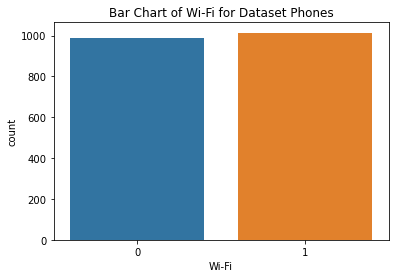

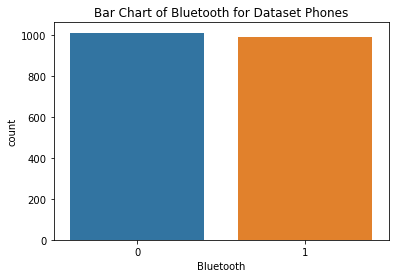

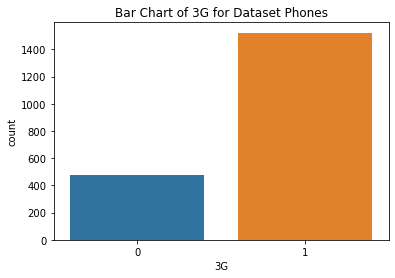

In [6]:
#Visualizations for binary variables
ax = sns.countplot(x=mobile.wifi)
ax.set(title = "Bar Chart of Wi-Fi for Dataset Phones", xlabel = "Wi-Fi")
plt.show() #Only about half of dataset phones have Wi-Fi capability--this is surprisingly low, as even poor-quality/old
#real-world phones have Wi-Fi capability

ax2 = sns.countplot(x=mobile.blue)
ax2.set(title = "Bar Chart of Bluetooth for Dataset Phones", xlabel = "Bluetooth")
plt.show() #Similarly, only about half of dataset phones have Bluetooth capability--all 8 of the real-world phones had 
#Bluetooth capability

ax3 = sns.countplot(x=mobile.three_g)
ax3.set(title = "Bar Chart of 3G for Dataset Phones", xlabel = "3G")
plt.show() #About a quarter of dataset phones did not have 3G capability, whereas all 8 of the real-world phones had 3G

In [7]:
#Analysis to determine what memory capabilities the best and worst phones in the dataset have
print("Dataset phones:")
print("Best RAM:", str(np.max(mobile.ram))) #Best RAM is 3,998 MB ~ 4 GB, similar to Samsung Galaxy A8
print("Worst RAM:", str(np.min(mobile.ram))) #Worst RAM is 256 MB
print("Median RAM:", str(np.median(mobile.ram)))
print("Best Memory:", str(np.max(mobile.int_memory))) #Best memory is 64 GB, which is same as iPhone X, Google Pixel 2
print("Worst Memory:", str(np.min(mobile.int_memory))) #Worst memory is 2 GB
print("Median Memory:", str(np.median(mobile.int_memory)))

print(" ")
print("Real phones:")
print("Best RAM:", str(np.max(real_phones.ram)))
print("Worst RAM:", str(np.min(real_phones.ram)))
print("Best Memory:", str(np.max(real_phones.int_memory)))
print("Worst Memory:", str(np.min(real_phones.int_memory)))

#In terms of memory, the real phones are comparable to the data set. The maximum memory and RAM are similar. The Nokia X6
#has worse RAM than the minimun RAM of our dataset, and the Blackberry Curve 9360 has worse internal memory than any of the
#phones in our dataset.

Dataset phones:
Best RAM: 3998
Worst RAM: 256
Median RAM: 2146.5
Best Memory: 64
Worst Memory: 2
Median Memory: 32.0
 
Real phones:
Best RAM: 4000.0
Worst RAM: 128.0
Best Memory: 64.0
Worst Memory: 0.5


In [8]:
#Battery performance of phones from dataset vs. real-life phones
print("Dataset phones:")
print("Best Battery Power:", str(np.max(mobile.battery_power))) #Best battery power is 1998 mAh
print("Worst Battery Power:", str(np.min(mobile.battery_power))) #Worst battery power is 501 mAh
print("Median Battery Power:", str(np.median(mobile.battery_power)))
print("Best Talk Time:", str(np.max(mobile.talk_time)))
print("Worst Talk Time:", str(np.min(mobile.talk_time))) #Worst talk time is 2 hours--this is poor for a cell phone
print("Median Talk Time:", str(np.median(mobile.talk_time)))
print(" ")
print("Real phones:")
print("Best Battery Power:", str(np.max(real_phones.battery_power)))
print("Worst Battery Power:", str(np.min(real_phones.battery_power)))
print("Median Battery Power:", str(np.median(real_phones.battery_power)))
print("Best Talk Time:", str(np.max(real_phones.talk_time)))
print("Worst Talk Time:", str(np.min(real_phones.talk_time)))
print("Median Talk Time:", str(np.median(real_phones.talk_time)))

#Based on this information, it appears that real-world phones have better battery performance than the phones in the
#dataset. The median battery power in our dataset is close to the worst battery power from the sample of real-world phones.
#There are only 8 real phones in our sample, but the median battery power and talk time from the real-world phones both
#exceed the corresponding maximum values from our dataset.

Dataset phones:
Best Battery Power: 1998
Worst Battery Power: 501
Median Battery Power: 1226.0
Best Talk Time: 20
Worst Talk Time: 2
Median Talk Time: 11.0
 
Real phones:
Best Battery Power: 3900.0
Worst Battery Power: 1000.0
Median Battery Power: 2708.0
Best Talk Time: 34.0
Worst Talk Time: 5.0
Median Talk Time: 22.0


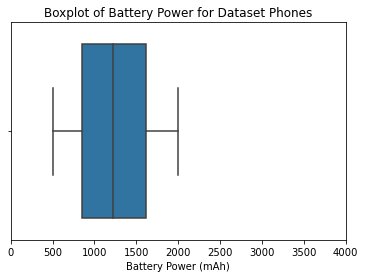

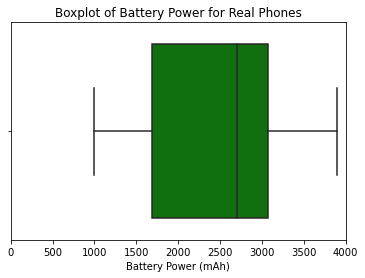

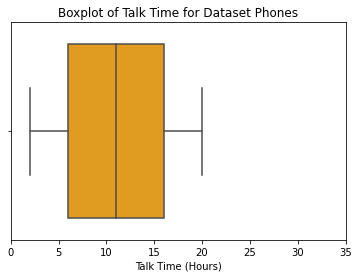

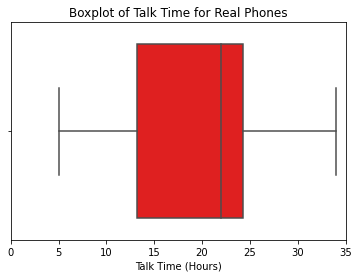

In [9]:
ax4 = sns.boxplot(x=mobile.battery_power)
ax4.set(title = "Boxplot of Battery Power for Dataset Phones", xlabel = "Battery Power (mAh)")
plt.xlim(0,4000)
plt.show()

ax5 = sns.boxplot(x=real_phones.battery_power, color = "green")
ax5.set(title = "Boxplot of Battery Power for Real Phones", xlabel = "Battery Power (mAh)")
plt.xlim(0,4000)
plt.show()

ax6 = sns.boxplot(x=mobile.talk_time, color = "orange")
ax6.set(title = "Boxplot of Talk Time for Dataset Phones", xlabel = "Talk Time (Hours)")
plt.xlim(0,35)
plt.show()

ax7 = sns.boxplot(x=real_phones.talk_time, color = "red")
ax7.set(title = "Boxplot of Talk Time for Real Phones", xlabel = "Talk Time (Hours)")
plt.xlim(0,35)
plt.show()

#The battery powers of our dataset are roughly uniformly distributed, so it is surprising to see how low the values are
#compared to the real-world phones. Similarly, the distribution of talk time has values lower than we would expect based
#on the real-world phones.

In [10]:
#Computing speed (clock speed and cores):
print("Dataset phones:")
print("Best Clock Speed:", str(np.max(mobile.clock_speed)))
print("Worst Clock Speed:", str(np.min(mobile.clock_speed)))
print("Median Clock Speed:", str(np.median(mobile.clock_speed)))
print("Most CPU Cores:", str(np.max(mobile.n_cores)))
print("Fewest CPU Cores:", str(np.min(mobile.n_cores)))
print("Median CPU Cores:", str(np.median(mobile.n_cores)))
print(" ")
print("Real phones:")
print("Best Clock Speed:", str(np.max(real_phones.clock_speed)))
print("Worst Clock Speed:", str(np.min(real_phones.clock_speed)))
print("Most CPU Cores:", str(np.max(real_phones.n_cores)))
print("Fewest CPU Cores:", str(np.min(real_phones.n_cores)))

#The dataset phones and real-world phones have similar numbers in terms of computing speed.

Dataset phones:
Best Clock Speed: 3.0
Worst Clock Speed: 0.5
Median Clock Speed: 1.5
Most CPU Cores: 8
Fewest CPU Cores: 1
Median CPU Cores: 4.0
 
Real phones:
Best Clock Speed: 2.7
Worst Clock Speed: 0.4
Most CPU Cores: 8.0
Fewest CPU Cores: 1.0


In [11]:
#Camera quality:
print("Dataset phones:")
print("Best Front Camera:", str(np.max(mobile.fc)))
print("Worst Front Camera:", str(np.min(mobile.fc)))
print("Median Front Camera:", str(np.median(mobile.fc)))
print("Best Primary Camera:", str(np.max(mobile.pc)))
print("Worst Primary Camera:", str(np.min(mobile.pc)))
print("Median Primary Camera:", str(np.median(mobile.pc)))
print(" ")
print("Real phones:")
print("Best Front Camera:", str(np.max(real_phones.fc)))
print("Worst Front Camera:", str(np.min(real_phones.fc)))
print("Best Primary Camera:", str(np.max(real_phones.pc)))
print("Worst Primary Camera:", str(np.min(real_phones.pc)))

#The dataset phones and real-world phones have fairly similar numbers when comparing megapixels in the front cameras
#and primary cameras.

Dataset phones:
Best Front Camera: 19
Worst Front Camera: 0
Median Front Camera: 3.0
Best Primary Camera: 20
Worst Primary Camera: 0
Median Primary Camera: 10.0
 
Real phones:
Best Front Camera: 16.0
Worst Front Camera: 0.0
Best Primary Camera: 21.0
Worst Primary Camera: 5.0


In [23]:
#Creating phone class
class phone:
    #constructor
    def __init__(self, name, year, comp_data, battery_power=0, ram=0):
        self.name = name
        self.year = year
        self.comp_data = comp_data
        self.battery_power = battery_power
        self.ram = ram
    def identity(self): #Provides description of phone name and year
        return("This phone is the " + str(self.name) + ", made in " + str(self.year) + ".")
    def battery_percentile(self): #Provides percent of phones in comp_data with lower battery power
        return("This phone has higher battery power than " + str(round(self.comp_data[self.comp_data.battery_power < \
            self.battery_power].shape[0]/self.comp_data.shape[0] * 100, 1)) + "% of phones in your dataset.")
    def ram_percentile(self): #Provides percent of phones in comp_data with lower RAM
        return("This phone has higher RAM than " + str(round(self.comp_data[self.comp_data.ram <= \
            self.ram].shape[0]/self.comp_data.shape[0] * 100, 1)) + "% of phones in your dataset.")

print(round(mobile[mobile.ram <= 1000].shape[0]/mobile.shape[0] * 100, 1))
print(round(mobile[mobile.battery_power < 1130].shape[0]/mobile.shape[0] * 100, 1))

19.9
43.2


In [25]:
#Unit testing class
class phoneTestSuite(unittest.TestCase):     
    #Create a phone
    phone1 = phone("iPhone 5", 2012, mobile, battery_power = 1440, ram = 1000)
    phone2 = phone("Motorola FlipOut", 2010, mobile, battery_power = 1130)
    def test_identity(self):
        expected_id = "This phone is the iPhone 5, made in 2012." #This is expected output of identity function
        self.assertEqual(self.phone1.identity(), expected_id)
    def test_battery_percentile(self): #Tests battery_percentile() function
        expected_bat_perc = "This phone has higher battery power than 43.2% of phones in your dataset." #Expected output
        self.assertEqual(self.phone2.battery_percentile(), expected_bat_perc)
    def test_ram_percentile(self): #Tests ram_percentile() function
        expected_ram_perc = "This phone has higher RAM than 19.9% of phones in your dataset." #Expected output
        self.assertEqual(self.phone1.ram_percentile(), expected_ram_perc)
    def test_ram_percentile2(self): #Tests ram_percentile() function when no RAM is entered by user
        expected_ram_perc2 = "This phone has higher RAM than 0.0% of phones in your dataset." #Expected output
        self.assertEqual(self.phone2.ram_percentile(), expected_ram_perc2)
 
unittest.main(argv=[''], verbosity = 2, exit=False)
#if __name__ == '__main__':
#    unittest.main()    

#All tests pass

test_battery_percentile (__main__.phoneTestSuite) ... ok
test_identity (__main__.phoneTestSuite) ... ok
test_ram_percentile (__main__.phoneTestSuite) ... ok
test_ram_percentile2 (__main__.phoneTestSuite) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.010s

OK


In [27]:
#Example phone to demonstrate phone class and related methods
phone_example = phone("Samsung Galaxy Note 4", 2014, mobile, battery_power = 3220, ram = 3000)
print(phone_example.identity())
print(phone_example.battery_percentile())
print(phone_example.ram_percentile())

This phone is the Samsung Galaxy Note 4, made in 2014.
This phone has higher battery power than 100.0% of phones in your dataset.
This phone has higher RAM than 73.8% of phones in your dataset.
